Lorenz Oscillator
=================

Description of the problem
--------------------------

Consider the chaotic Lorenz oscillator with governing dynamic equations
given as

\begin{align}
\begin{split}
\dot{x} &= \sigma(y-x)\\
\dot{y} &= x(\rho-z)-y\\
\dot{z} &= xy-\beta z\\
\end{split}
\end{align}

with $\sigma = 10$, $\rho = 28$ and $\beta = 8/3$. The training data set is
comprised of two trajectories with initial conditions:

\begin{align}
\begin{split}
x_{0_1} &= \begin{bmatrix} -8 & 7 & 27 \end{bmatrix}^\top\\
x_{0_2} &= \begin{bmatrix} 6 & -5 & 24 \end{bmatrix}^\top.
\end{split}
\end{align}

The data are recorded at a frequency of $50$Hz for $2$ seconds. An initial value of $\lambda_1 = 10$ is chosen
for the low-pass filter. The initial dictionary of basis functions
consists of a total of 56 polynomial basis functions up to degree 5
in state variables.

Two cases are considered with the first test case
corresponding to perfect measurements and the second test case
corresponding to measurements being corrupted by zero mean Gaussian
white noise of standard deviation $10^{-2}$.

The code below shows how to use the python systemID package to find a sparse representation
of the dynamics of the Lorenz oscillator.

Case 1: No noise
----------------

First, import all necessary packages.

In [1]:
import systemID as sysID

import numpy as np
import scipy.linalg as LA

import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams.update({"text.usetex": True, "font.family": "sans-serif", "font.serif": ["Computer Modern Roman"]})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

\
&nbsp;
\
&nbsp;
Define the parameters of the study. Data is collected at a frequency of 50Hz.

In [2]:
frequency = 50
total_time = 2
number_steps = int(total_time * frequency + 1)
tspan = np.linspace(0, total_time, number_steps)

\
&nbsp;
\
&nbsp;
Define the dynamics of the Lorenz oscillator.

In [3]:
state_dimension = 3

sigma = 10
rho = 28
beta = 8/3

def F(x, t, u):
    dxdt = np.zeros(3)
    dxdt[0] = sigma * (x[1] - x[0])
    dxdt[1] = x[0] * (rho - x[2]) - x[1]
    dxdt[2] = x[0] * x[1] - beta * x[2]
    return dxdt

def G(x, t, u):
    return x

\
&nbsp;
\
&nbsp;
Generate the training data.

In [4]:
number_experiments = 2
x0s = [np.array([-8, 7, 27]), np.array([6, -5, 24])]
input_signals = []
output_signals = []
for i in range(number_experiments):
    true_system = sysID.continuous_nonlinear_model(x0s[i], F, G=G)
    input_signal = sysID.continuous_signal()
    input_signals.append(sysID.discrete_signal(frequency=frequency, data=np.zeros([state_dimension, number_steps])))
    output_signals.append(sysID.propagate(input_signal, true_system, tspan=tspan)[0])

\
&nbsp;
\
&nbsp;
Plot training trajectories.

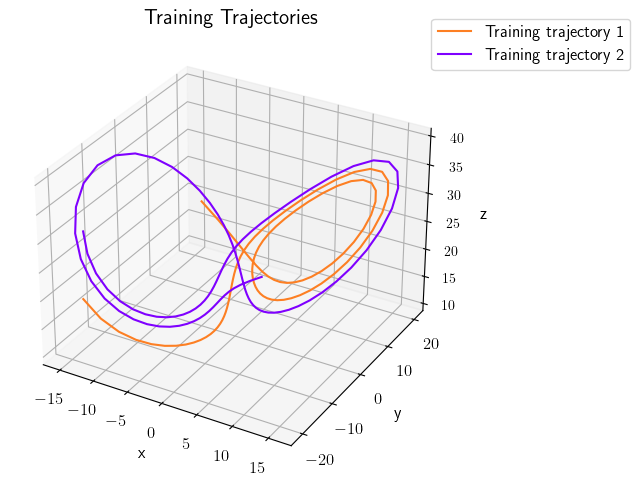

In [5]:
fig = plt.figure(num=1, figsize=[6, 5])
ax = plt.axes(projection='3d')
ax.plot(output_signals[0].data[0, :], output_signals[0].data[1, :], output_signals[0].data[2, :], color=(253/255, 127/255, 35/255), label='Training trajectory 1')
ax.plot(output_signals[1].data[0, :], output_signals[1].data[1, :], output_signals[1].data[2, :], color=(127/255, 0/255, 255/255), label='Training trajectory 2')
ax.set_xlabel(r'x', fontsize=12)
ax.set_ylabel(r'y', fontsize=12)
ax.set_zlabel(r'z', fontsize=12)
plt.title(r'Training Trajectories', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(1.18, 1.05), ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

\
&nbsp;
\
&nbsp;
Generate list of polynomial basis functions up to order 5.

In [6]:
order = 5
index = sysID.polynomial_index(state_dimension, order, max_order=order)
basis_functions = sysID.polynomial_basis_functions(index)

\
&nbsp;
\
&nbsp;
Solve least-squares and $\ell-1$ norm minimization problem.

In [7]:
filter_coefficient = 10
relax_coefficient = 2
threshold = 1e-1
max_iterations = 5
init_weight = 'least_squares'

sparse = sysID.sparse_1st_order(input_signals, output_signals, basis_functions, filter_coefficient, relax_coefficient, threshold, max_iterations, init_weight=init_weight)

Dimension  1  of  3
Signal number  1  of  2
Signal number  2  of  2
Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
indices non zero: [1, 6]
indices zero: [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Dimension  2  of  3
Signal number  1  of  2
Signal number  2  of  2
Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
indices non zero: [1, 6, 22]
indices zero: [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Dimension  3  of  3
Signal number  1  of  2
Signal number  2  of  2
Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
indices non zero: [7, 21]
indices zero: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15

\
&nbsp;
\
&nbsp;
Represent coefficients.

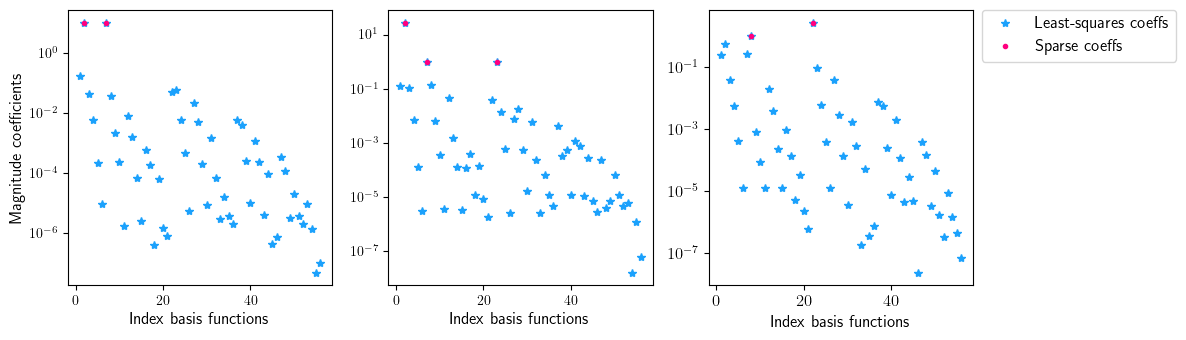

In [8]:
fig = plt.figure(num=2, figsize=[12, 3.5])
ax = fig.add_subplot(1, 3, 1)
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_least_squares[:, 0]), '*', color=(27/255, 161/255, 252/255), label='Least-squares coeffs')
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_sparse[:, 0]), '.', color=(255/255, 0/255, 127/255), label='Sparse coeffs')
ax.set_xlabel(r'Index basis functions', fontsize=12)
ax.set_ylabel(r'Magnitude coefficients', fontsize=12)

ax = fig.add_subplot(1, 3, 2)
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_least_squares[:, 1]), '*', color=(27/255, 161/255, 252/255), label='Least-squares coeffs')
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_sparse[:, 1]), '.', color=(255/255, 0/255, 127/255), label='Sparse coeffs')
ax.set_xlabel(r'Index basis functions', fontsize=12)

ax = fig.add_subplot(1, 3, 3)
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_least_squares[:, 2]), '*', color=(27/255, 161/255, 252/255), label='Least-squares coeffs')
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_sparse[:, 2]), '.', color=(255/255, 0/255, 127/255), label='Sparse coeffs')
ax.set_xlabel(r'Index basis functions', fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 1.03), ncol=1, fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

\
&nbsp;
\
&nbsp;
The two sets of coefficients are now used on an unseen trajectory for 5 seconds.

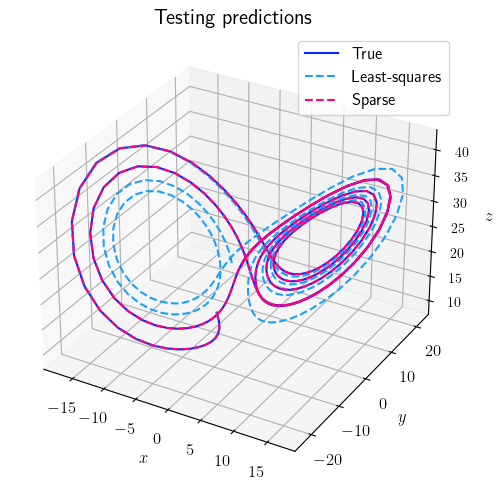

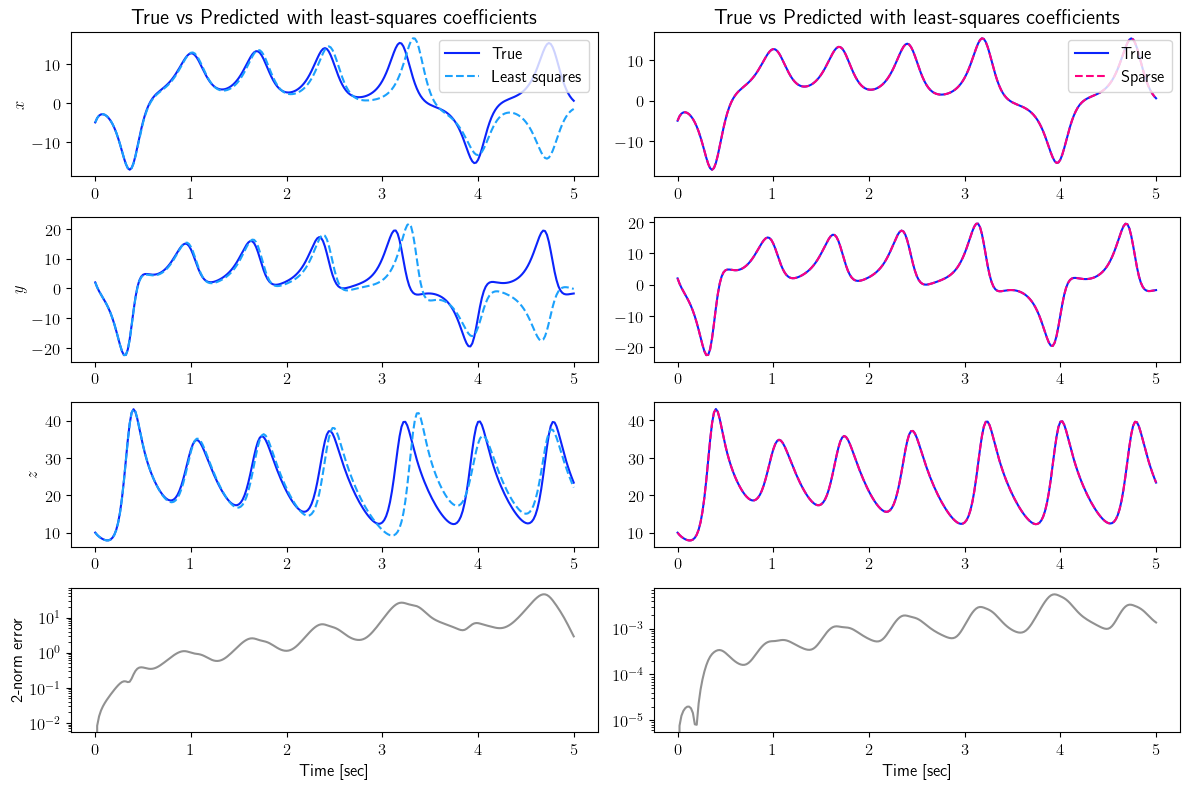

In [9]:
total_time_testing = 5
number_steps_testing = int(total_time_testing * frequency + 1)
tspan_testing = np.linspace(0, total_time_testing, number_steps_testing)

x0_test = np.array([-5, 2, 10])
true_system_test = sysID.continuous_nonlinear_model(x0_test, F, G=G)
input_signal_test = sysID.continuous_signal()
output_signal_test = sysID.propagate(input_signal_test, true_system_test, tspan=tspan_testing)[0]

def F_least_squares(x, t, u):
    dxdt = np.zeros([state_dimension])
    for i in range(len(basis_functions)):
        dxdt = dxdt + np.transpose(basis_functions[i](x) * sparse.coefficients_least_squares[i, :])
    return dxdt

def F_sparse(x, t, u):
    dxdt = np.zeros([state_dimension])
    for i in range(len(basis_functions)):
        dxdt = dxdt + np.transpose(basis_functions[i](x) * sparse.coefficients_sparse[i, :])
    return dxdt

least_squares_system_test = sysID.continuous_nonlinear_model(x0_test, F_least_squares, G=G)
sparse_system_test = sysID.continuous_nonlinear_model(x0_test, F_sparse, G=G)

least_squares_output_signal_test = sysID.propagate(input_signal_test, least_squares_system_test, tspan=tspan_testing)[0]
sparse_output_signal_test = sysID.propagate(input_signal_test, sparse_system_test, tspan=tspan_testing)[0]



fig = plt.figure(num=3, figsize=[6, 5])
ax = plt.axes(projection='3d')
ax.plot(output_signal_test.data[0, :], output_signal_test.data[1, :], output_signal_test.data[2, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(least_squares_output_signal_test.data[0, :], least_squares_output_signal_test.data[1, :], least_squares_output_signal_test.data[2, :], '--', color=(27/255, 161/255, 252/255), label=r'Least-squares')
ax.plot(sparse_output_signal_test.data[0, :], sparse_output_signal_test.data[1, :], sparse_output_signal_test.data[2, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
ax.set_zlabel(r'$z$', fontsize=12)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.title(r'Testing predictions', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



fig = plt.figure(num=4, figsize=[12, 8])

ax = fig.add_subplot(4, 2, 1)
ax.plot(tspan_testing, output_signal_test.data[0, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, least_squares_output_signal_test.data[0, :], '--', color=(27/255, 161/255, 252/255), label=r'Least squares')
plt.ylabel(r'$x$', fontsize=12)
plt.title(r'True vs Predicted with least-squares coefficients', fontsize=15)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 2)
ax.plot(tspan_testing, output_signal_test.data[0, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, sparse_output_signal_test.data[0, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
plt.title(r'True vs Predicted with least-squares coefficients', fontsize=15)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 3)
ax.plot(tspan_testing, output_signal_test.data[1, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, least_squares_output_signal_test.data[1, :], '--', color=(27/255, 161/255, 252/255), label=r'Least squares')
plt.ylabel(r'$y$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 4)
ax.plot(tspan_testing, output_signal_test.data[1, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, sparse_output_signal_test.data[1, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 5)
ax.plot(tspan_testing, output_signal_test.data[2, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, least_squares_output_signal_test.data[2, :], '--', color=(27/255, 161/255, 252/255), label=r'Least squares')
plt.ylabel(r'$z$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 6)
ax.plot(tspan_testing, output_signal_test.data[2, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, sparse_output_signal_test.data[2, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 7)
ax.semilogy(tspan_testing, LA.norm(output_signal_test.data - least_squares_output_signal_test.data, axis=0), color=(145/255, 145/255, 145/255))
plt.ylabel(r'2-norm error', fontsize=12)
plt.xlabel(r'Time [sec]', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 8)
ax.semilogy(tspan_testing, LA.norm(output_signal_test.data - sparse_output_signal_test.data, axis=0), color=(145/255, 145/255, 145/255))
plt.xlabel(r'Time [sec]', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Case 2: Measurements with additive white noise
----------------------------------------------

Now, a Gaussian noise with standard deviation $10^{-2}$ is added to the measured
output signal. The filter coefficient is set to 1, the threshold is
lifted right above the noise level to 0.1 and the relaxation coefficient
is tightened to 1.5.

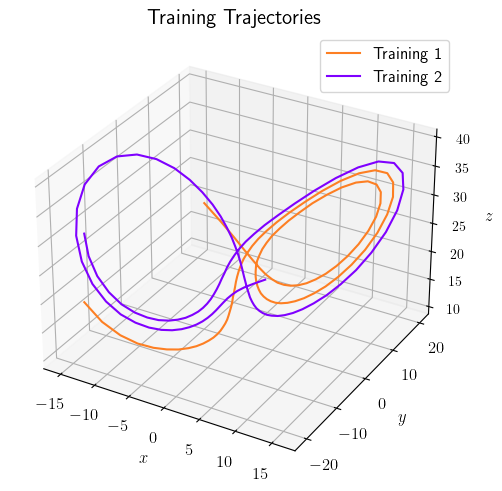

In [10]:
for i in range(number_experiments):
    output_signals[i].data = output_signals[i].data + 1e-2 * np.random.randn(state_dimension, number_steps)


fig = plt.figure(num=2, figsize=[6, 5])
ax = plt.axes(projection='3d')
ax.plot(output_signals[0].data[0, :], output_signals[0].data[1, :], output_signals[0].data[2, :], color=(253/255, 127/255, 35/255), label='Training 1')
ax.plot(output_signals[1].data[0, :], output_signals[1].data[1, :], output_signals[1].data[2, :], color=(127/255, 0/255, 255/255), label='Training 2')
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
ax.set_zlabel(r'$z$', fontsize=12)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.title(r'Training Trajectories', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Dimension  1  of  3
Signal number  1  of  2
Signal number  2  of  2
Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
indices non zero: [1, 6]
indices zero: [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Dimension  2  of  3
Signal number  1  of  2
Signal number  2  of  2
Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
indices non zero: [0, 1, 6, 22]
indices zero: [2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Dimension  3  of  3
Signal number  1  of  2
Signal number  2  of  2
Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
indices non zero: [7, 21]
indices zero: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15

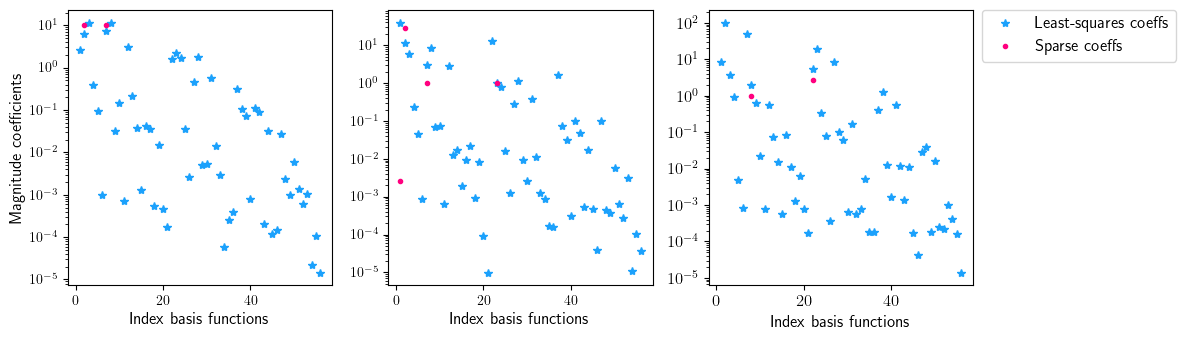

In [11]:
order = 5
index = sysID.polynomial_index(state_dimension, order, max_order=order)
basis_functions = sysID.polynomial_basis_functions(index)

filter_coefficient = 1
relax_coefficient = 1.5
threshold = 1e-1
max_iterations = 5
init_weight = 'least_squares'

sparse = sysID.sparse_1st_order(input_signals, output_signals, basis_functions, filter_coefficient, relax_coefficient, threshold, max_iterations, init_weight=init_weight)

fig = plt.figure(num=2, figsize=[12, 3.5])
ax = fig.add_subplot(1, 3, 1)
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_least_squares[:, 0]), '*', color=(27/255, 161/255, 252/255), label='Least-squares coeffs')
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_sparse[:, 0]), '.', color=(255/255, 0/255, 127/255), label='Sparse coeffs')
ax.set_xlabel(r'Index basis functions', fontsize=12)
ax.set_ylabel(r'Magnitude coefficients', fontsize=12)

ax = fig.add_subplot(1, 3, 2)
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_least_squares[:, 1]), '*', color=(27/255, 161/255, 252/255), label='Least-squares coeffs')
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_sparse[:, 1]), '.', color=(255/255, 0/255, 127/255), label='Sparse coeffs')
ax.set_xlabel(r'Index basis functions', fontsize=12)

ax = fig.add_subplot(1, 3, 3)
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_least_squares[:, 2]), '*', color=(27/255, 161/255, 252/255), label='Least-squares coeffs')
ax.semilogy(np.linspace(1, len(index), len(index)), np.abs(sparse.coefficients_sparse[:, 2]), '.', color=(255/255, 0/255, 127/255), label='Sparse coeffs')
ax.set_xlabel(r'Index basis functions', fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 1.03), ncol=1, fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.9/site-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


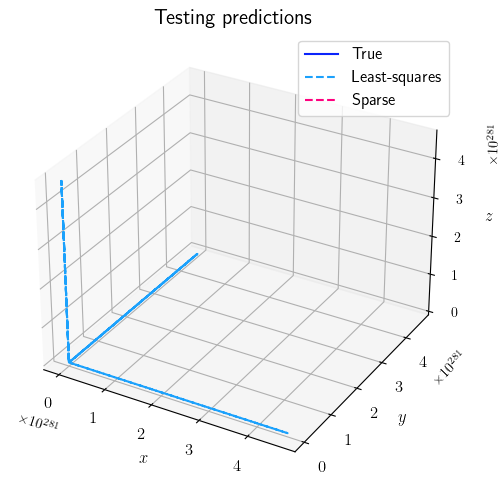

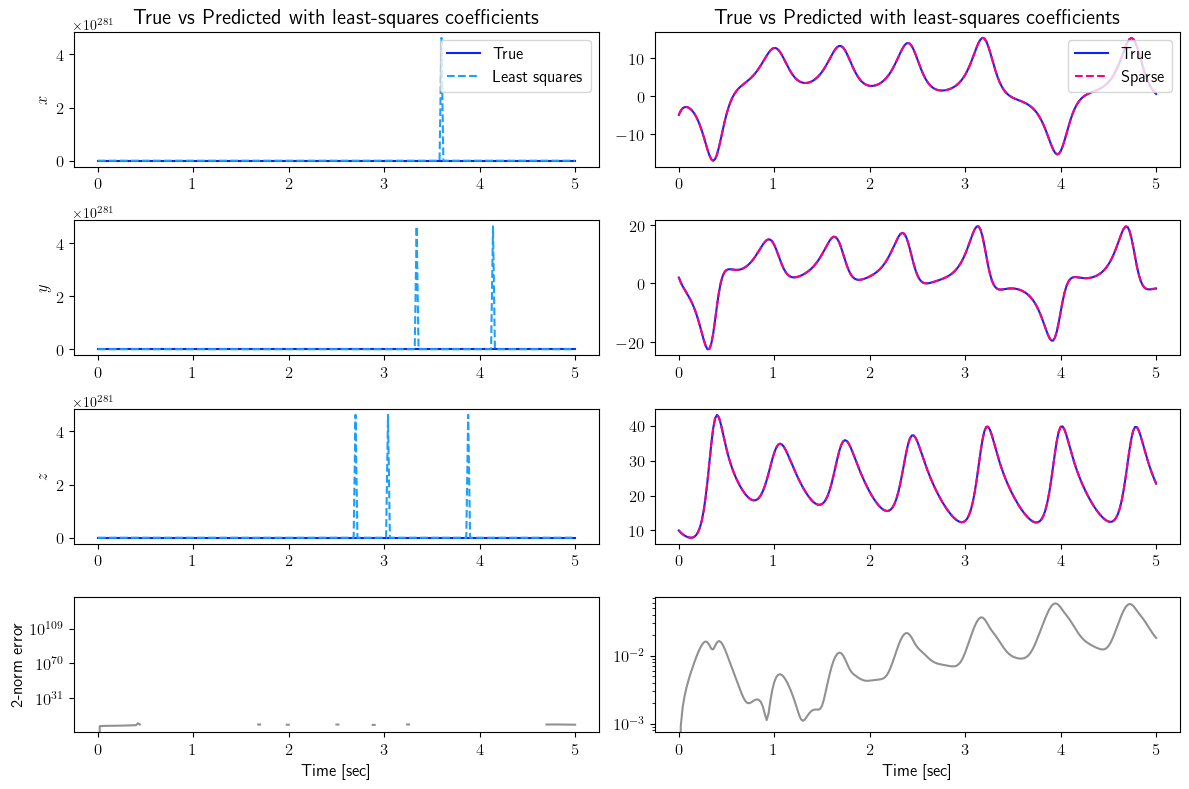

In [12]:
total_time_testing = 5
number_steps_testing = int(total_time_testing * frequency + 1)
tspan_testing = np.linspace(0, total_time_testing, number_steps_testing)

x0_test = np.array([-5, 2, 10])
true_system_test = sysID.continuous_nonlinear_model(x0_test, F, G=G)
input_signal_test = sysID.continuous_signal()
output_signal_test = sysID.propagate(input_signal_test, true_system_test, tspan=tspan_testing)[0]

def F_least_squares(x, t, u):
    dxdt = np.zeros([state_dimension])
    for i in range(len(basis_functions)):
        dxdt = dxdt + np.transpose(basis_functions[i](x) * sparse.coefficients_least_squares[i, :])
    return dxdt

def F_sparse(x, t, u):
    dxdt = np.zeros([state_dimension])
    for i in range(len(basis_functions)):
        dxdt = dxdt + np.transpose(basis_functions[i](x) * sparse.coefficients_sparse[i, :])
    return dxdt

least_squares_system_test = sysID.continuous_nonlinear_model(x0_test, F_least_squares, G=G)
sparse_system_test = sysID.continuous_nonlinear_model(x0_test, F_sparse, G=G)

least_squares_output_signal_test = sysID.propagate(input_signal_test, least_squares_system_test, tspan=tspan_testing)[0]
sparse_output_signal_test = sysID.propagate(input_signal_test, sparse_system_test, tspan=tspan_testing)[0]



fig = plt.figure(num=3, figsize=[6, 5])
ax = plt.axes(projection='3d')
ax.plot(output_signal_test.data[0, :], output_signal_test.data[1, :], output_signal_test.data[2, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(least_squares_output_signal_test.data[0, :], least_squares_output_signal_test.data[1, :], least_squares_output_signal_test.data[2, :], '--', color=(27/255, 161/255, 252/255), label=r'Least-squares')
ax.plot(sparse_output_signal_test.data[0, :], sparse_output_signal_test.data[1, :], sparse_output_signal_test.data[2, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
ax.set_zlabel(r'$z$', fontsize=12)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.title(r'Testing predictions', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



fig = plt.figure(num=4, figsize=[12, 8])

ax = fig.add_subplot(4, 2, 1)
ax.plot(tspan_testing, output_signal_test.data[0, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, least_squares_output_signal_test.data[0, :], '--', color=(27/255, 161/255, 252/255), label=r'Least squares')
plt.ylabel(r'$x$', fontsize=12)
plt.title(r'True vs Predicted with least-squares coefficients', fontsize=15)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 2)
ax.plot(tspan_testing, output_signal_test.data[0, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, sparse_output_signal_test.data[0, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
plt.title(r'True vs Predicted with least-squares coefficients', fontsize=15)
ax.legend(loc='upper right', ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 3)
ax.plot(tspan_testing, output_signal_test.data[1, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, least_squares_output_signal_test.data[1, :], '--', color=(27/255, 161/255, 252/255), label=r'Least squares')
plt.ylabel(r'$y$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 4)
ax.plot(tspan_testing, output_signal_test.data[1, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, sparse_output_signal_test.data[1, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 5)
ax.plot(tspan_testing, output_signal_test.data[2, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, least_squares_output_signal_test.data[2, :], '--', color=(27/255, 161/255, 252/255), label=r'Least squares')
plt.ylabel(r'$z$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 6)
ax.plot(tspan_testing, output_signal_test.data[2, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, sparse_output_signal_test.data[2, :], '--', color=(255/255, 0/255, 127/255), label=r'Sparse')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 7)
ax.semilogy(tspan_testing, LA.norm(output_signal_test.data - least_squares_output_signal_test.data, axis=0), color=(145/255, 145/255, 145/255))
plt.ylabel(r'2-norm error', fontsize=12)
plt.xlabel(r'Time [sec]', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(4, 2, 8)
ax.semilogy(tspan_testing, LA.norm(output_signal_test.data - sparse_output_signal_test.data, axis=0), color=(145/255, 145/255, 145/255))
plt.xlabel(r'Time [sec]', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

It can be seen that the least-squares solution completely
diverges and is not able to reproduce the dynamics.
Notice also that an extra basis function (of low magnitude though) has been picked-up
in the sparse solution, due to noisy measurements.